MOTIVATION

Detection of  the age of abalone accurately is important for both farmers and customers to determine its price. Given a dataset that contains physical characteristics of a large number of abalones, our goal in this report is to evaluate the performance of Ridge regressor in its ability to predict the abalone age with high level of accuracy. 
The project evaluates the performance using metrics like Mean Percentage Error (MPE), Mean Absolute Percentage Error (MAPE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²).

In [3]:
#Basic library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets
#from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
#Libraries for model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#import optuna
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance


#Libraries for models
from sklearn.decomposition import PCA 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor,Ridge
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error as mlse
import warnings
warnings.filterwarnings('ignore')

<br>
Data summary and statistics

In [5]:
df_train = pd.read_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-2/playground-series-s4e4/train.csv')
X_test = pd.read_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-2/playground-series-s4e4/test.csv')

df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [6]:
df_train.shape # dimension

(90615, 10)

In [7]:
df_train.info() # all numeric variables except "Sex" as categorical & types with no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [8]:
summary_stats = df_train.describe()
summary_stats

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


So there are 7 numeric/continuous variables, 1 categorical variable ("Sex"), and "Rings" as the integer/disrete target.
<br>
<br>




Pairplot Analysis of df_train Dataset:

There seems to be high multicollinearity between the predictors (coef. > 0.9). The decision here is to go with Ridge as classifier.

<Axes: >

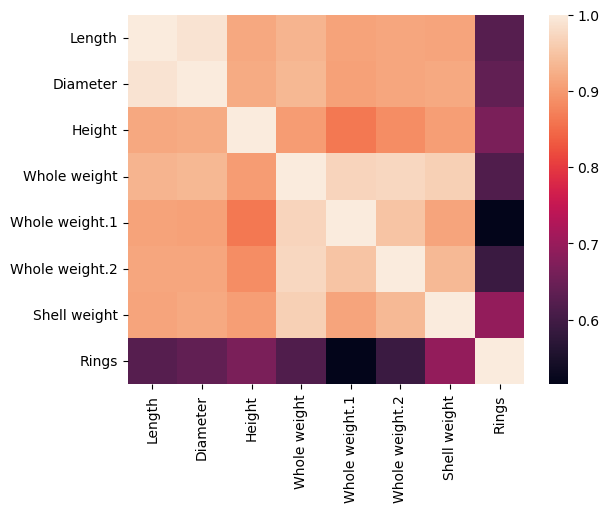

In [11]:
data_shrinked = df_train.drop(columns=[ "id"])
correlation_matrix = data_shrinked.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix)

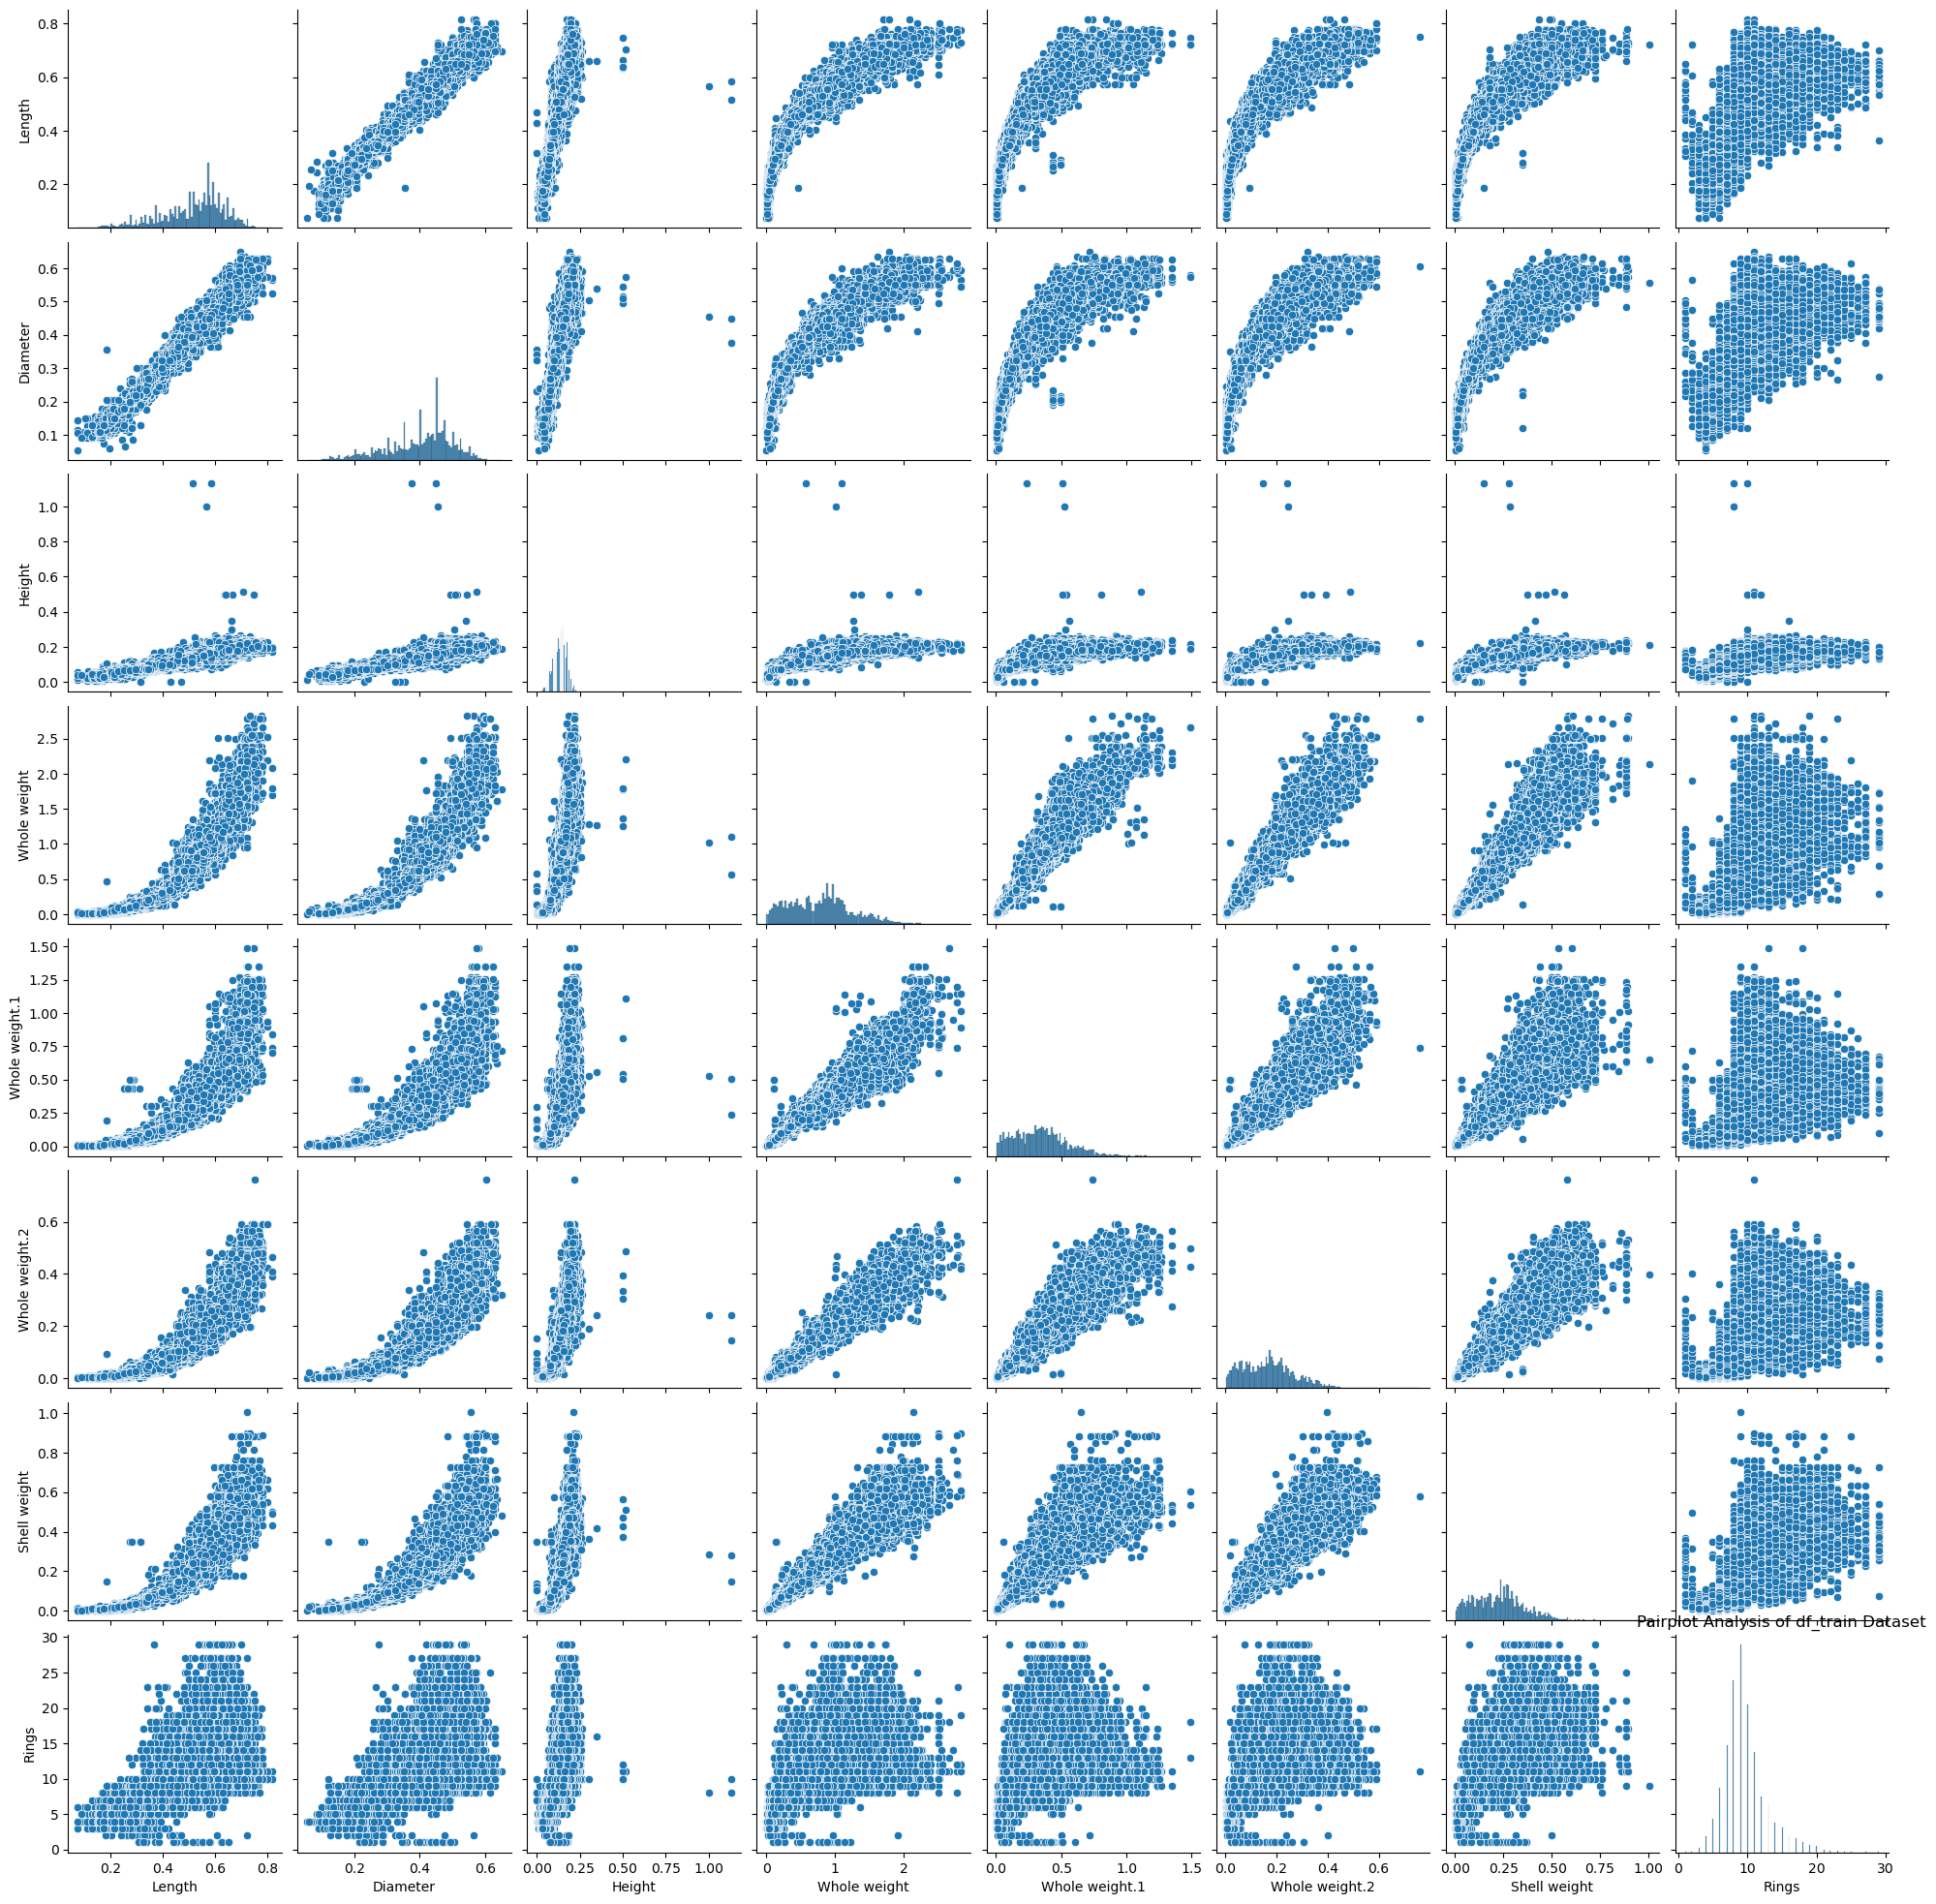

In [12]:
warnings.filterwarnings("ignore")
data_shrinked = df_train.drop(columns=[ "id"])
sns.pairplot(data_shrinked)
plt.title('Pairplot Analysis of df_train Dataset')
plt.show()

df_train_test_split 80:20

In [14]:
Y = df_train['Rings']
X = df_train.drop(['id', 'Rings'], axis = 1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, random_state = 42, stratify = X['Sex'])


In [15]:
X_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')

<br>
<br>
Convert categorical Sex in X_train to dummy columns

In [17]:
X_train.reset_index(drop = True, inplace = True)
encoder = OneHotEncoder(sparse_output = False)
encode_sex_data = encoder.fit_transform(X_train[['Sex']])
encode_sex_cols = encoder.categories_[0]
encode_sex_data = pd.DataFrame(encode_sex_data, columns = encode_sex_cols)
X_train = pd.concat([X_train, encode_sex_data], axis = 1)
X_train.drop(['Sex'], axis = 1, inplace = True)

In [18]:
X_train

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,0.465,0.355,0.100,0.5670,0.2725,0.1175,0.1140,0.0,1.0,0.0
1,0.490,0.380,0.125,0.4935,0.2025,0.1075,0.1500,0.0,1.0,0.0
2,0.415,0.315,0.095,0.3300,0.1575,0.0660,0.0900,0.0,1.0,0.0
3,0.460,0.345,0.120,0.4085,0.1900,0.0825,0.1310,0.0,1.0,0.0
4,0.590,0.455,0.125,0.8725,0.3490,0.2090,0.2750,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
72487,0.550,0.430,0.150,0.9760,0.4525,0.1700,0.2690,0.0,0.0,1.0
72488,0.600,0.470,0.155,1.0360,0.4035,0.1960,0.3250,0.0,0.0,1.0
72489,0.585,0.465,0.165,0.9355,0.4035,0.2275,0.2590,0.0,0.0,1.0
72490,0.455,0.355,0.115,0.4545,0.1705,0.1070,0.1345,1.0,0.0,0.0


<br>
<br>
Check for feature inflation(VIF) for X_train shows high values >> 5

In [20]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

          feature        VIF
0          Length  50.999335
1        Diameter  54.061426
2          Height   7.529097
3    Whole weight  68.318672
4  Whole weight.1  21.296923
5  Whole weight.2  19.976169
6    Shell weight  18.165152
7               F  24.566960
8               I  24.414305
9               M  28.119170


Convert categorical Sex in X_val to dummy columns

In [22]:
scaler = StandardScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)

In [23]:
X_val.reset_index(drop = True, inplace = True)
encode_sex_data = encoder.transform(X_val[['Sex']])
encode_sex_cols = encoder.categories_[0]
encode_sex_data = pd.DataFrame(encode_sex_data, columns = encode_sex_cols)
X_val = pd.concat([X_val, encode_sex_data], axis = 1)
X_val.drop(['Sex'], axis = 1, inplace = True)

#X_val = scaler.transform(X_val)
X_val = pd.DataFrame(X_val, columns = cols)

scaler = StandardScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)

In [25]:
X_val

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,0.590,0.460,0.150,1.0380,0.4335,0.2160,0.2900,0.0,0.0,1.0
1,0.450,0.350,0.125,0.4565,0.1900,0.0885,0.1500,0.0,0.0,1.0
2,0.635,0.500,0.160,1.0680,0.4935,0.2275,0.3335,0.0,0.0,1.0
3,0.540,0.420,0.125,0.8145,0.2950,0.1650,0.2050,0.0,0.0,1.0
4,0.315,0.225,0.070,0.1240,0.0500,0.0320,0.0425,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18118,0.505,0.385,0.125,0.6095,0.2755,0.1435,0.1650,0.0,1.0,0.0
18119,0.390,0.300,0.100,0.3345,0.1270,0.0665,0.0900,0.0,1.0,0.0
18120,0.610,0.490,0.160,1.0685,0.4460,0.2540,0.3150,1.0,0.0,0.0
18121,0.430,0.305,0.090,0.3315,0.1295,0.0620,0.0900,0.0,1.0,0.0


<br>
<br>
Standardize X-train

In [27]:
X_train = pd.DataFrame(X_train, columns = cols)
X_train

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,-0.442240,-0.478072,-0.933925,-0.485938,-0.334420,-0.514980,-0.860605,-0.642814,1.318421,-0.721599
1,-0.230383,-0.222524,-0.276123,-0.646755,-0.677303,-0.614212,-0.583926,-0.642814,1.318421,-0.721599
2,-0.865954,-0.886948,-1.065486,-1.004491,-0.897728,-1.026024,-1.045059,-0.642814,1.318421,-0.721599
3,-0.484612,-0.580291,-0.407684,-0.832734,-0.738532,-0.862292,-0.729951,-0.642814,1.318421,-0.721599
4,0.617044,0.544118,-0.276123,0.182492,0.040302,0.392990,0.376768,-0.642814,-0.758483,1.385812
...,...,...,...,...,...,...,...,...,...,...
72487,0.278073,0.288570,0.381679,0.408949,0.547278,0.005986,0.330655,-0.642814,-0.758483,1.385812
72488,0.701787,0.697446,0.513239,0.540228,0.307260,0.263989,0.761046,-0.642814,-0.758483,1.385812
72489,0.574673,0.646337,0.776360,0.320335,0.307260,0.576569,0.253799,-0.642814,-0.758483,1.385812
72490,-0.526983,-0.478072,-0.539244,-0.732087,-0.834050,-0.619174,-0.703052,1.555660,-0.758483,-0.721599


<br>
<br>
Standardize X_val

In [29]:
scaler = StandardScaler()
cols = X_val.columns
X_val = scaler.fit_transform(X_val)

In [30]:
X_val = pd.DataFrame(X_val, columns = cols)
X_val

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,0.615264,0.593902,0.385540,0.541541,0.451029,0.458166,0.493426,-0.642814,-0.758528,1.385896
1,-0.560624,-0.519377,-0.272093,-0.722128,-0.733726,-0.798697,-0.578921,-0.642814,-0.758528,1.385896
2,0.993227,0.998730,0.648593,0.606735,0.742960,0.571530,0.826619,-0.642814,-0.758528,1.385896
3,0.195304,0.189073,-0.272093,0.055849,-0.222846,-0.044579,-0.157642,-0.642814,-0.758528,1.385896
4,-1.694515,-1.784467,-1.718885,-1.444691,-1.414899,-1.355660,-1.402330,-0.642814,1.318342,-0.721555
...,...,...,...,...,...,...,...,...,...,...
18118,-0.098668,-0.165152,-0.272093,-0.389641,-0.317724,-0.256521,-0.464027,-0.642814,1.318342,-0.721555
18119,-1.064575,-1.025413,-0.929726,-0.987249,-1.040254,-1.015568,-1.038498,-0.642814,1.318342,-0.721555
18120,0.783247,0.897523,0.648593,0.607821,0.511848,0.832760,0.684916,1.555660,-0.758528,-0.721555
18121,-0.728608,-0.974809,-1.192779,-0.993768,-1.028090,-1.059928,-1.038498,-0.642814,1.318342,-0.721555


In [31]:
X_train.shape

(72492, 10)

RIDGE MODEL : Fit X_train data (with very high VIF) & Y_train using Ridge Regressor

In [33]:
#ridge = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10).fit(X_train, Y_train)
Ridge = RidgeCV(alphas=arange(0, 10, 0.01), cv=10).fit(X_train, Y_train)
y_val_preds = Ridge.predict(X_val)
Ridge_mpe = np.round(np.mean((Y_val- y_val_preds)/Y_val),3)
Ridge_mape = np.round(MAPE(Y_val, y_val_preds),3)
Ridge_mse = np.round(mean_squared_error(Y_val, y_val_preds, squared=False),3)
Ridge_rmse = np.round(Ridge_mse**0.5,3)
Ridge_mae = np.round(mean_absolute_error(Y_val, y_val_preds),3)
Ridge_r2 = np.round(Ridge.score(X_train, Y_train),3)

print(f"Ridge MPE: {Ridge_mpe}")
print(f"Ridge MAPE: {Ridge_mape}")
print(f"Ridge MSE: {Ridge_mse}")
print(f"Ridge RMSE: {Ridge_rmse}")
print(f"Ridge MAE: {Ridge_mae}")
print(f"Ridge R^2: {Ridge_r2}")
print(f"Ridge Alpha: {Ridge.alpha_}")

Ridge MPE: -0.04
Ridge MAPE: 0.142
Ridge MSE: 1.977
Ridge RMSE: 1.406
Ridge MAE: 1.368
Ridge R^2: 0.603
Ridge Alpha: 4.76


Lowest MSE with optimal alpha = 4.76
<br>
<br>
<br>
Ridge output results predict target variable "Rings" in the range from -1.124650 to 22.409937 as seen from plot below

In [35]:
pd.Series(y_val_preds).describe()

count    18123.000000
mean         9.701001
std          2.462403
min         -1.124650
25%          7.889777
50%          9.682588
75%         11.177652
max         22.409937
dtype: float64

<br>
<br>
Plot of Actual Rings values vs. Predicted with Ridge regression

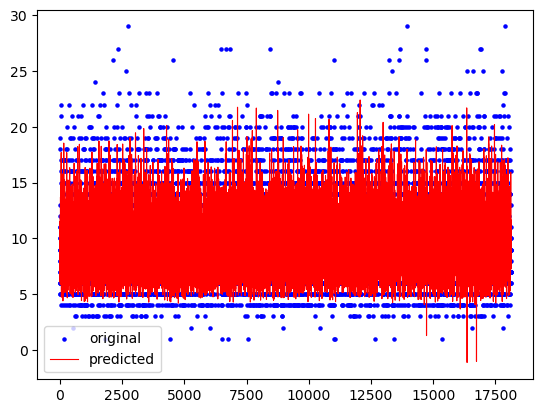

In [37]:
x_ax = range(len(X_val))
plt.scatter(x_ax, Y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_val_preds, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Figure 1 Actual Rings values vs. Predicted with Ridge regression of Abalone dataset
<br>
<br>
<br>

As expected in Ridge regression, full set of features is in the model

In [40]:
for i in range(10):
    print(f"Coefficient {i}: {Ridge.coef_[i]:.2f}")

Coefficient 0: -0.28
Coefficient 1: 0.85
Coefficient 2: 0.77
Coefficient 3: 1.72
Coefficient 4: -3.21
Coefficient 5: -0.69
Coefficient 6: 2.68
Coefficient 7: 0.11
Coefficient 8: -0.22
Coefficient 9: 0.11


<br>
<br>
Preprocessing of the X_test data

In [42]:
ids = X_test['id']
X_test.drop(['id'], axis = 1, inplace = True)
X_test.reset_index(drop = True, inplace = True)
encode_sex_data = encoder.transform(X_test[['Sex']])
encode_sex_cols = encoder.categories_[0]
encode_sex_data = pd.DataFrame(encode_sex_data, columns = encode_sex_cols)
X_test = pd.concat([X_test, encode_sex_data], axis = 1)
X_test.drop(['Sex'], axis = 1, inplace = True)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)

In [43]:
X_test.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,1.077219,0.745713,0.517066,0.976165,1.351151,1.409439,0.573852,-0.642814,-0.758528,1.385896
1,0.531272,0.593902,0.648593,0.422020,0.669978,0.492668,0.378531,-0.642814,-0.758528,1.385896
2,0.363288,0.189073,0.122487,0.110177,0.056922,0.147647,0.114275,-0.642814,-0.758528,1.385896
3,0.447280,0.897523,0.254013,0.185149,0.056922,0.167362,0.072147,-0.642814,-0.758528,1.385896
4,-0.854595,-0.772395,-0.666673,-0.936181,-0.891855,-1.010639,-0.923604,-0.642814,1.318342,-0.721555


<br>
<br>
Prediction of "Rings" values for X_test using Ridge model (to be submitted to Kaggle)

In [45]:
y_test_preds = Ridge.predict(X_test)
submission = pd.DataFrame({'id':ids, 'Rings':y_test_preds})
submission

,id,Rings
0,90615,8.593671
1,90616,10.059323
2,90617,10.316020
3,90618,10.996134
4,90619,7.801795
...,...,...
60406,151021,6.684567
60407,151022,9.269067
60408,151023,10.849831
60409,151024,13.581137


<br>
<br>
Write predictioned "Rings" values for X_test to file submission.csv to be submitted to Kaggle

In [47]:
submission.to_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-2/playground-series-s4e4/submission.csv', index = None)

<br>
<br>
<br>
SUMMARY and CONCLUSION

Model: Ridge Regressor (L2 Regularization)

It was known from VIF calculations above that all the features and the target have high VIF values, a Ridge model was then fitted to predict the Rings count using all standardized numeric predictors and its performance was evaluated using MPE, MAPE, RMSE, MSE, MAE, and R-squared. 

Results: 
1) Our model was evaluated using the MAPE value, which showed a 14% error rate in the predicted Abalone age (Rings count). This means that there is a deviation of 14% of the predicted Rings count from the actual Rings count. 

2) The accuracy of the Ridge model was measured using the R-squared metric, which indicated an accuracy rate of 60.3%. It means 60.3 % of the variability observed in the target variable is explained by the regression model.

3) Since Ridge regression introduces an additional ‘regularization’ parameter that penalizesthe size of the coefficiens, the prediction is on the low side of the actual values (Figure 1), and as checked, the minimum prediction for the train data shown above is a negative value of -1.124650.

4) Calculated optimal alpha (with 10-fold) = 4.76

5) Summary Metrics for Ridge Model


 &emsp; Model&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;MPE&emsp;&emsp;&emsp;MAPE&emsp;&emsp;RMSE&emsp;&emsp;MSE&emsp;&emsp;MAE&emsp;&emsp;R2
<br>
  &emsp;Ridge Regression&emsp;&emsp;-0.040&emsp;&emsp;0.142&emsp;&emsp;1.406&emsp;&emsp;1.977&emsp;&emsp;1.368&emsp;&emsp;0.603
<br>
  &emsp;





